In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할
from sklearn.model_selection import train_test_split

# 로지스틱 회귀
from statsmodels.api import Logit

# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# 의사결정나무
from sklearn.tree import DecisionTreeClassifier

# 그래디언트부스팅
from sklearn.ensemble import GradientBoostingClassifier

# SVM
from sklearn.svm import SVC

#KNN
#from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

# 평가함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

# column counter
from collections import Counter

import graphviz

from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

import os

In [2]:
import warnings

warnings.filterwarnings("ignore")

matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"


In [3]:
df = pd.read_csv("../data/BigData/HMEQ.csv")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
# JOB의 결측치를 "Othre"로 대체
df['JOB'].fillna("Other", inplace=True)

# 다른 결측치의 경우 평균으로 대체
df.fillna(df.mean(), inplace=True)

In [5]:
df_raw_dummy = pd.get_dummies(df)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [6]:
df_x=df_raw_dummy.drop("BAD", axis=1)
df_y=df_raw_dummy['BAD']

In [7]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)
print("train size is {}".format(df_train_x.shape))
print("test size is {}".format(df_test_x.shape))

print("test size is {}".format(df_test_y.shape))

train size is (2623, 18)
test size is (1125, 18)
test size is (1125,)


In [8]:
tree_uncustomized =  RandomForestClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.992
Accuracy on test set : 0.944


##### n_estimator 정하기

In [9]:
train_accuracy =[]; test_accuracy=[]

para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    tree=RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['TrainAccuracy']=train_accuracy
df_accuracy_n['TestAccuracy']=test_accuracy

df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.992,0.944
1,20,0.999,0.943
2,30,0.999,0.942
3,40,1.000,0.946
4,50,1.000,0.944
5,60,1.000,0.948
6,70,1.000,0.947
7,80,1.000,0.947
8,90,1.000,0.946
9,100,1.000,0.946


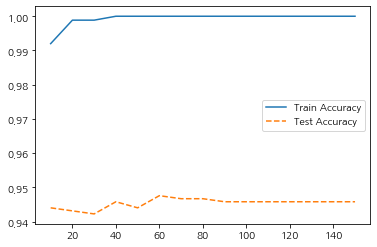

In [10]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

n_estimators : 트리 수 변경에 따른 모델 oob error 변화

In [11]:
oob_error=[]

for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

Text(0.5, 0, 'n_estimators')

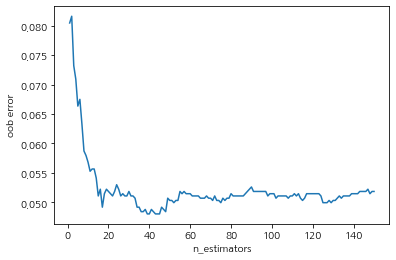

In [12]:
plt.plot(range(1,151), oob_error)
plt.ylabel("oob error")
plt.xlabel('n_estimators')


    생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가하며 OOB Error는 감소,
    모델의 특성을 고려하여 100 선택(자료가 많은 경우에는 트리 수를 늘릴 수 있음)

In [13]:

n_estimators=100

##### Depth 정하기

In [14]:
train_accuracy =[]; test_accuracy=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=RandomForestClassifier(n_estimators=100,max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.908,0.908
1,2,0.912,0.910
2,3,0.932,0.928
3,4,0.933,0.930
4,5,0.938,0.931
5,6,0.941,0.932
6,7,0.945,0.934
7,8,0.949,0.936
8,9,0.951,0.935
9,10,0.956,0.938


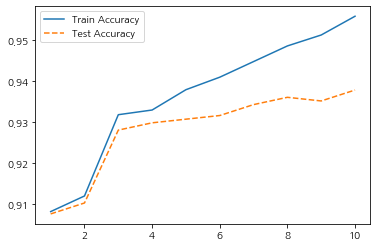

In [15]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    최대 깊이 증가에 따라 모델의 정확도는 증가하며 Train/Test 데이터의 성능 변화를 고려하여 4 선택

##### min_samples_split 정하기

In [16]:
train_accuracy =[]; test_accuracy=[]

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=RandomForestClassifier(n_estimators=100,max_depth=4,
                                min_samples_split=v_min_samples_split,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['Split']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['TestAccuracy']=test_accuracy

df_accuracy_split.round(3)

,Split,TrainAccuracy,TestAccuracy
0,10,0.933,0.929
1,20,0.933,0.929
2,30,0.932,0.929
3,40,0.933,0.929
4,50,0.932,0.929
5,60,0.932,0.929
6,70,0.932,0.929
7,80,0.932,0.928
8,90,0.932,0.928
9,100,0.932,0.928


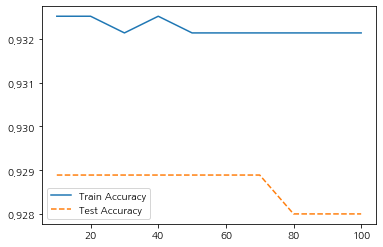

In [17]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하나 test 데이터의 성능 변화를 고려하면 70까지는 영향이 없으며 80은 자료수가 커서 특정 값을 지정하지 않음

##### min_samples_leaf정하기

In [18]:
train_accuracy =[]; test_accuracy=[]

para_leaf = [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=RandomForestClassifier(n_estimators=100,max_depth=4,
                                min_samples_split=70,
                                min_samples_leaf=v_min_samples_leaf
                                ,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['Leaf']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['TestAccuracy']=test_accuracy

df_accuracy_leaf.round(3)

,Leaf,TrainAccuracy,TestAccuracy
0,10,0.928,0.926
1,20,0.927,0.925
2,30,0.927,0.925
3,40,0.920,0.916
4,50,0.908,0.908
5,60,0.908,0.908
6,70,0.908,0.908
7,80,0.908,0.908
8,90,0.908,0.908
9,100,0.908,0.908


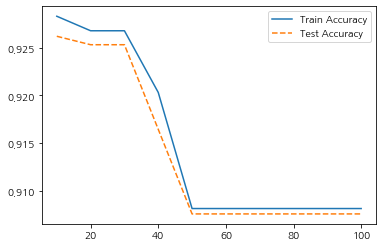

In [19]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며
    Train/Test 데이터의 성능 변화를 고려하여 20 선택

##### 최종 모델 선정

In [20]:
rf_final = RandomForestClassifier(n_estimators=100,max_depth=4, min_samples_split=70,
                                   min_samples_leaf=20, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 0.927
Accuracy on test set : 0.925
Confusion matrix : 
[[1021    0]
 [  84   20]]


train/test 데이터의 정분류율이 비슷한 수준(**92.5%**)으로 안정적인 모델임을 확인할 수 있음

In [21]:
v_feature_name = df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.476
5,DELINQ,0.189
4,DEROG,0.077
7,NINQ,0.060
8,CLNO,0.052
6,CLAGE,0.048
0,LOAN,0.033
2,VALUE,0.027
16,JOB_Sales,0.012
1,MORTDUE,0.010


Text(0, 0.5, '설명변수')

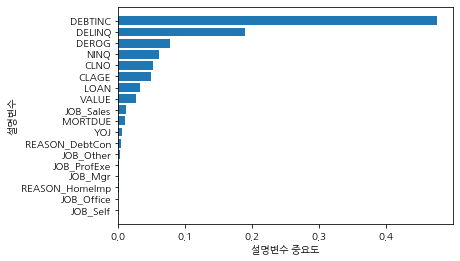

In [22]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("설명변수 중요도")
plt.ylabel('설명변수')

    중요 설명변수 : 부채비율(DEBTINC), 연체된 신용 한도의 수(DELINQ)순으로 영향도가 큰 순으로 해석할 수 있음
    단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있음

# Gradient Boosting

In [23]:
df = pd.read_csv("../data/BigData/HMEQ.csv")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [24]:
# JOB의 결측치를 "Othre"로 대체
df['JOB'].fillna("Other", inplace=True)

# 다른 결측치의 경우 평균으로 대체
df.fillna(df.mean(), inplace=True)

In [25]:
df_raw_dummy = pd.get_dummies(df)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [26]:
df_x=df_raw_dummy.drop("BAD", axis=1)
df_y=df_raw_dummy['BAD']

In [27]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)
print("train size is {}".format(df_train_x.shape))
print("test size is {}".format(df_test_x.shape))

print("test size is {}".format(df_test_y.shape))

train size is (2623, 18)
test size is (1125, 18)
test size is (1125,)


In [28]:
tree_uncustomized =  GradientBoostingClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.963
Accuracy on test set : 0.941


learning rate : 학습률 변경에 따른 모델 성능

In [29]:
train_accuracy = []; test_accuracy=[]

para_lr = [lr*0.01 for lr in range(1,50)]

for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(learning_rate=v_learning_rate, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['LearningRate']=para_lr
df_accuracy_lr['TrainAccuracy']=train_accuracy
df_accuracy_lr['TestAccuracy']=test_accuracy

df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.01,0.933,0.927
1,0.02,0.939,0.932
2,0.03,0.942,0.936
3,0.04,0.948,0.940
4,0.05,0.952,0.941
5,0.06,0.957,0.940
6,0.07,0.958,0.940
7,0.08,0.961,0.939
8,0.09,0.964,0.943
9,0.10,0.963,0.941


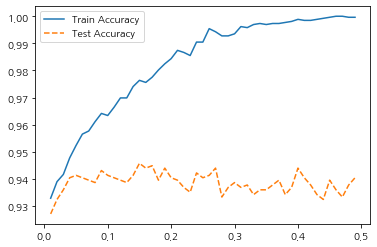

In [30]:
plt.plot(para_lr, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    learning rate가 0.4이상일 때 train score가 안정되기 때문에 0.4 선택(자료가 많은 경우에는 트리 수를 늘릴 수 있음)

##### n_estimator 정하기

In [31]:
train_accuracy =[]; test_accuracy=[]

para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    tree=GradientBoostingClassifier(learning_rate=0.4,n_estimators=v_n_estimators, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['TrainAccuracy']=train_accuracy
df_accuracy_n['TestAccuracy']=test_accuracy

df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.955,0.932
1,20,0.965,0.935
2,30,0.973,0.937
3,40,0.981,0.938
4,50,0.987,0.939
5,60,0.989,0.940
6,70,0.994,0.942
7,80,0.995,0.941
8,90,0.998,0.942
9,100,0.999,0.944


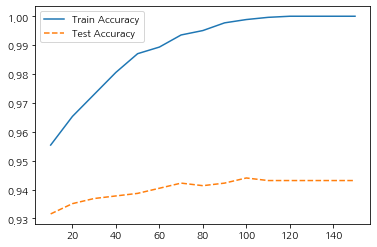

In [32]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    모델의 특성을 고려하여 100 선택(자료가 많은 경우에는 트리 수를 늘릴 수 있음)

##### Depth 정하기

In [33]:
train_accuracy =[]; test_accuracy=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=GradientBoostingClassifier(learning_rate=0.4,n_estimators=100,max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.945,0.937
1,2,0.978,0.931
2,3,0.999,0.944
3,4,1.000,0.939
4,5,1.000,0.942
5,6,1.000,0.941
6,7,1.000,0.940
7,8,1.000,0.941
8,9,1.000,0.941
9,10,1.000,0.945


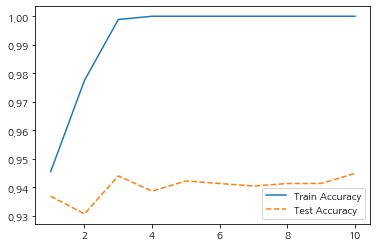

In [34]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    최대 깊이 증가에 따라 모델의 정확도는 증가하며 Train/Test 데이터의 성능 변화를 고려하여 5 선택

##### min_samples_split 정하기

In [35]:
train_accuracy =[]; test_accuracy=[]

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=GradientBoostingClassifier(learning_rate=0.4,n_estimators=100,max_depth=5,
                                min_samples_split=v_min_samples_split,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['Split']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['TestAccuracy']=test_accuracy

df_accuracy_split.round(3)

,Split,TrainAccuracy,TestAccuracy
0,10,1.0,0.935
1,20,1.0,0.942
2,30,1.0,0.940
3,40,1.0,0.944
4,50,1.0,0.942
5,60,1.0,0.943
6,70,1.0,0.943
7,80,1.0,0.948
8,90,1.0,0.946
9,100,1.0,0.944


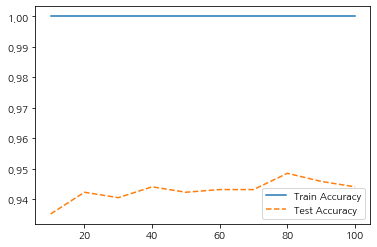

In [36]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 차이가 존재하나 test 데이터의 성능 변화를 고려하면 60정도에서 안정성을 보여준다고 판단하여 60으로 결정함

##### min_samples_leaf정하기

In [37]:
train_accuracy =[]; test_accuracy=[]

para_leaf = [n_leaf*5 for n_leaf in range(1,7)]

for v_min_samples_leaf in para_leaf:
    tree=GradientBoostingClassifier(learning_rate=0.4,n_estimators=100,max_depth=4,
                                min_samples_split=60,
                                min_samples_leaf=v_min_samples_leaf
                                ,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['Leaf']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['TestAccuracy']=test_accuracy

df_accuracy_leaf.round(3)

,Leaf,TrainAccuracy,TestAccuracy
0,5,1.0,0.946
1,10,1.0,0.948
2,15,1.0,0.946
3,20,1.0,0.944
4,25,1.0,0.945
5,30,1.0,0.943


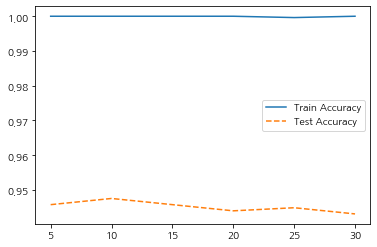

In [38]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    과적합 요소를 배제하고자 25를 선택함 (전체데이터3748개) Train/Test 데이터의 성능 변화를 고려하여 25 선택

In [39]:
df.shape

(3748, 13)

##### 최종 모델 선정

In [40]:
gb_final = GradientBoostingClassifier(learning_rate=0.4, n_estimators=100,max_depth=4, min_samples_split=60,
                                   min_samples_leaf=25, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 1.000
Accuracy on test set : 0.945
Confusion matrix : 
[[1021    0]
 [  84   20]]


train/test 데이터의 정분류율이 비슷한 수준(**94.5%**)으로 안정적인 모델임을 확인할 수 있음

In [41]:
v_feature_name = df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.324
6,CLAGE,0.126
2,VALUE,0.114
5,DELINQ,0.089
0,LOAN,0.080
8,CLNO,0.076
1,MORTDUE,0.056
7,NINQ,0.039
4,DEROG,0.039
3,YOJ,0.029


Text(0, 0.5, '설명변수')

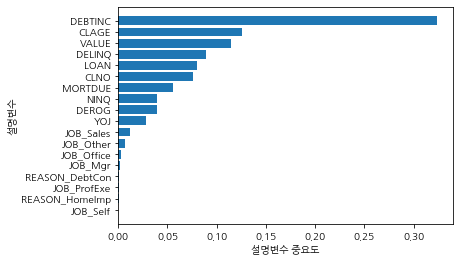

In [42]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("설명변수 중요도")
plt.ylabel('설명변수')

    중요 설명변수 : 부채비율(DEBTINC), CLAGE순으로 영향도가 큰 순으로 해석할 수 있음
    단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있음

# SVM(Support Vector Machine)

In [43]:
df = pd.read_csv("../data/BigData/HMEQ.csv")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [44]:
# JOB의 결측치를 "Othre"로 대체
df['JOB'].fillna("Other", inplace=True)

# 다른 결측치의 경우 평균으로 대체
df.fillna(df.mean(), inplace=True)

In [45]:
df_raw_dummy = pd.get_dummies(df)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [46]:
df_x=df_raw_dummy.drop("BAD", axis=1)
df_y=df_raw_dummy['BAD']

In [47]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)
print("train size is {}".format(df_train_x.shape))
print("test size is {}".format(df_test_x.shape))

print("test size is {}".format(df_test_y.shape))

train size is (2623, 18)
test size is (1125, 18)
test size is (1125,)


In [48]:
df = pd.read_csv("../data/BigData/HMEQ.csv")
df.head()

# JOB의 결측치를 "Othre"로 대체
df['JOB'].fillna("Other", inplace=True)

# 다른 결측치의 경우 평균으로 대체
df.fillna(df.mean(), inplace=True)

df_raw_dummy = pd.get_dummies(df)
df_raw_dummy.head()

df_x=df_raw_dummy.drop("BAD", axis=1)
df_y=df_raw_dummy['BAD']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)
print("train size is {}".format(df_train_x.shape))
print("test size is {}".format(df_test_x.shape))

print("test size is {}".format(df_test_y.shape))

train size is (2623, 18)
test size is (1125, 18)
test size is (1125,)


In [49]:
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set:{:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set:1.000
Accuracy on test set : 0.908


C : 규제에 대한 강도 변경

In [50]:
train_accuracy=[]; test_accuracy=[]
para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm=SVC(C=v_C, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy']=train_accuracy
df_accuracy_c['TestAccuracy']=test_accuracy

df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,1.000,0.908
3,10.00,1.000,0.908


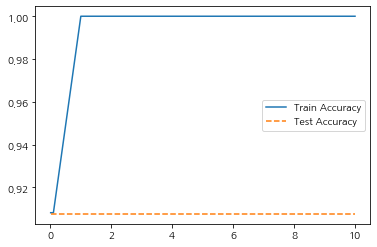

In [51]:
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

C가 1 이상이면 train 데이터 이용한 모델의 정확도는 1(과대적합), test 정확도는 변화 없음

##### Gamma : 훈련 샘플이 미치는 영향의 범위를 변경

In [52]:
train_accuracy =[]; test_accuracy=[]

para_gamma = [10**gamma for gamma in range(-5,5)]

for v_gamma in para_gamma:
    svm=SVC(C=0.1,gamma=v_gamma, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['Gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['TestAccuracy']=test_accuracy

df_accuracy_gamma.round(3)

,Gamma,TrainAccuracy,TestAccuracy
0,0.000,0.908,0.908
1,0.000,0.908,0.908
2,0.001,0.908,0.908
3,0.010,0.908,0.908
4,0.100,0.908,0.908
5,1.000,0.908,0.908
6,10.000,0.908,0.908
7,100.000,0.908,0.908
8,1000.000,0.908,0.908
9,10000.000,0.908,0.908


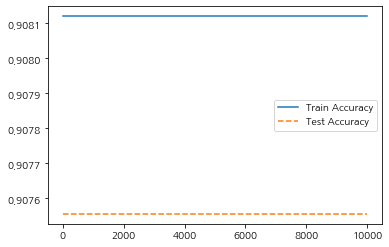

In [53]:
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

gamma 변화는 정확도에 영향을 미치지 않음

**SCALE** 변환

In [54]:
v_feature_name=df_train_x.columns

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [55]:
df_scaled_train_x, df_scaled_test_x, df_scaled_train_y, df_scaled_test_y = train_test_split(df_scaled, df_y, test_size=0.3, random_state=1234)
print("train size is {}".format(df_scaled_train_x.shape))
print("test size is {}".format(df_scaled_test_x.shape))

print("test size is {}".format(df_scaled_test_y.shape))

train size is (2623, 18)
test size is (1125, 18)
test size is (1125,)


In [56]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_scaled_train_y)

print("Accuracy on training set :{:.3f}".format(svm_scaled.score(df_scaled_train_x, df_scaled_train_y)))
print("Accuracy on test set :{:.3f}".format(svm_scaled.score(df_scaled_test_x, df_scaled_test_y)))

Accuracy on training set :0.944
Accuracy on test set :0.935


C : 규제에 대한 강도 변경

In [96]:
train_accuracy=[]; test_accuracy=[]
para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm=SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_scaled_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_scaled_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_scaled_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy']=train_accuracy
df_accuracy_c['TestAccuracy']=test_accuracy

df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.944,0.935
3,10.00,0.979,0.949


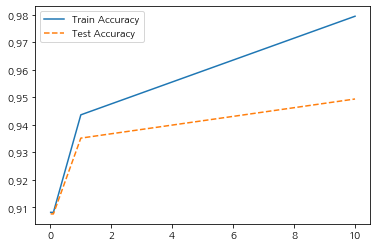

In [58]:
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

C가 1 일때, 모델의 정확도가 많이 증가함

##### Gamma : 훈련 샘플이 미치는 영향의 범위를 변경

In [59]:
train_accuracy =[]; test_accuracy=[]

para_gamma = [10**gamma for gamma in range(-2,2)]
para_gamma = [gamma*0.1 for gamma in range(1,10)]

for v_gamma in para_gamma:
    svm=SVC(C=1,gamma=v_gamma, random_state=1234)
    svm.fit(df_scaled_train_x, df_scaled_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_scaled_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_scaled_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['Gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['TestAccuracy']=test_accuracy

df_accuracy_gamma.round(3)

,Gamma,TrainAccuracy,TestAccuracy
0,0.1,0.960,0.942
1,0.2,0.976,0.936
2,0.3,0.981,0.929
3,0.4,0.984,0.929
4,0.5,0.986,0.927
5,0.6,0.990,0.924
6,0.7,0.991,0.923
7,0.8,0.994,0.922
8,0.9,0.995,0.923


In [60]:
para_gamma

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

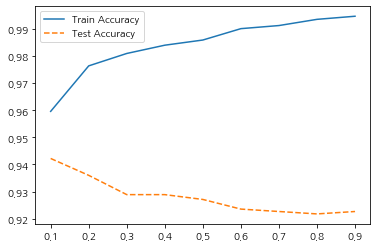

In [61]:
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

gamma가 1이하일때는 정확도에 변화가 존재하지 않는다.
gamma는 0.1로 지정

**final model**

In [62]:
svm_final = SVC(gamma=0.1, C=1,random_state=1234)
svm_final.fit(df_scaled_train_x, df_scaled_train_y)

y_pred=svm_final.predict(df_scaled_test_x)

print("Accuracy on training set :{:.3f}".format(svm_final.score(df_scaled_train_x, df_scaled_train_y)))
print("Accuracy on test set :{:.3f}".format(svm_final.score(df_scaled_test_x, df_scaled_test_y)))
print("Confusion Matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set :0.960
Accuracy on test set :0.942
Confusion Matrix :
[[1021    0]
 [  65   39]]


**False Negative의 값이 65로 True Positive의 값인 39의 두배 가까이 나왔으므로 썩 좋은 모델이라고는 할 수 없다**

#  KNN

In [63]:
df = pd.read_csv("../data/BigData/HMEQ.csv")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [64]:
# JOB의 결측치를 "Othre"로 대체
df['JOB'].fillna("Other", inplace=True)

# 다른 결측치의 경우 평균으로 대체
df.fillna(df.mean(), inplace=True)

In [65]:
df_raw_dummy = pd.get_dummies(df)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [66]:
df_x=df_raw_dummy.drop("BAD", axis=1)
df_y=df_raw_dummy['BAD']

In [82]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=3850)
print("train size is {}".format(df_train_x.shape))
print("test size is {}".format(df_test_x.shape))

print("test size is {}".format(df_test_y.shape))

train size is (2623, 18)
test size is (1125, 18)
test size is (1125,)


In [83]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
print('Accuracy on training set:{:.3f}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set:{:.3f}'.format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set:0.923
Accuracy on test set:0.893


In [84]:
train_accuracy=[]; test_accuracy=[]

para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_neighbors=pd.DataFrame()
df_accuracy_neighbors['Neighbors']=para_n_neighbors
df_accuracy_neighbors['TrainAccuracy']=train_accuracy
df_accuracy_neighbors['TestAccuracy']=test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.863
1,2,0.934,0.899
2,3,0.934,0.894
3,4,0.921,0.900
4,5,0.923,0.893
5,6,0.920,0.897
6,7,0.919,0.898
7,8,0.915,0.900
8,9,0.916,0.897
9,10,0.914,0.900


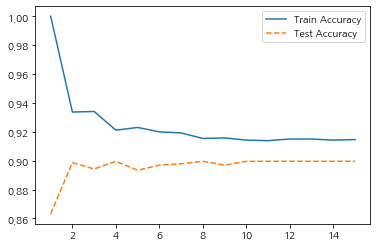

In [85]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

In [86]:
train_accuracy=[];test_accuracy=[]

para_n_neighbors= [i for i in range(1,11)]*3
para_metric= ['minkowski']*10+['euclidean']*10 + ['manhattan']* 10
for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors, metric= v_metric, weights='uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_metric= pd.DataFrame()
df_accuracy_metric['Neighbors']=para_n_neighbors
df_accuracy_metric['Metric']=para_metric
df_accuracy_metric['TrainAccuracy']=train_accuracy
df_accuracy_metric['TestAccuracy']=test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.863
1,2,minkowski,0.934,0.899
2,3,minkowski,0.934,0.894
3,4,minkowski,0.921,0.900
4,5,minkowski,0.923,0.893
5,6,minkowski,0.920,0.897
6,7,minkowski,0.919,0.898
7,8,minkowski,0.915,0.900
8,9,minkowski,0.916,0.897
9,10,minkowski,0.914,0.900


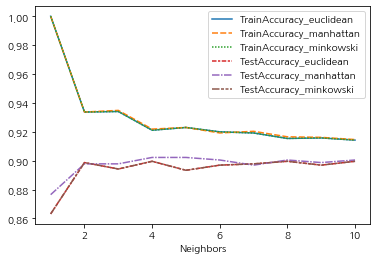

In [87]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index='Neighbors', columns='Metric', values=['TrainAccuracy', "TestAccuracy"])
level0= df_accuracy_metric_pivot.columns.get_level_values(0)
level1= df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+'_'+level1
sns.lineplot(data= df_accuracy_metric_pivot)

In [95]:
knn_model= KNeighborsClassifier(n_neighbors=4, weights='distance', metric='euclidean' )

knn_model.fit(df_train_x, df_train_y)

y_pred= knn_model.predict(df_test_x)
print('train data accuracy:{:.3f}'.format(knn_model.score(df_train_x, df_train_y)))
print('test data accuracy:{:.3f}'.format(knn_model.score(df_test_x, df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))

train data accuracy:1.000
test data accuracy:0.893
Confusion matrix:
[[990  20]
 [100  15]]


In [5]:
df.head(1)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa


In [7]:
df=pd.read_csv("../data/BigData/IRIS.csv")

df_x=df.drop("SPECIES",axis=1)
df_y=df['SPECIES']
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)
print("train size is {}".format(df_train_x.shape))
print("test size is {}".format(df_test_x.shape))

print("test size is {}".format(df_test_y.shape))

train size is (105, 4)
test size is (45, 4)
test size is (45,)


In [11]:
for n in range(1, 6):
    knn_model= KNeighborsClassifier(n_neighbors=n )

    knn_model.fit(df_train_x, df_train_y)

    y_pred= knn_model.predict(df_test_x)
    print('train data accuracy:{:.3f}'.format(knn_model.score(df_train_x, df_train_y)))
    print('test data accuracy:{:.3f}'.format(knn_model.score(df_test_x, df_test_y)))
    #print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))

train data accuracy:1.000
test data accuracy:0.978
train data accuracy:0.971
test data accuracy:0.978
train data accuracy:0.962
test data accuracy:0.978
train data accuracy:0.952
test data accuracy:0.956
train data accuracy:0.971
test data accuracy:1.000
